# RDKit

* The following command installs the RDKit library using pip.
* RDKit is a cheminformatics software library widely used in molecular modeling and drug discovery projects.


In [2]:
# Install RDKit library using pip
!pip install rdkit 

# Bunch:
* The following command installs the Bunch library using pip.
* Bunch is a lightweight Python module that provides a dictionary-like object with attribute-style access.


In [3]:
!pip install bunch

  Preparing metadata (setup.py) ... done
  Created wheel for bunch: filename=bunch-1.0.1-py3-none-any.whl size=7077 sha256=0f403ad507ef4eccf43c98cd895b58ac74c69f5ecabb216361ec0ddfa58ff1c7
  Stored in directory: /root/.cache/pip/wheels/b8/a9/fe/1ab6d927c80327a67fddb03d620f77b8168c0f6caaac3a5271
Successfully built bunch


In [4]:
!pip install wurlitzer
!pip install --upgrade keras==2.15.0
!pip install --upgrade tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 16.8 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 3.0.5
    Uninstalling keras-3.0.5:
      Successfully uninstalled keras-3.0.5


In [5]:
# Importing pandas library for data manipulation
import pandas as pd

# Importing Chem module from RDKit for molecular chemistry operations
from rdkit import Chem, DataStructs

# Importing random module for generating random numbers
import random

# Importing numpy library for numerical operations
import numpy as np

# Importing PropertyMol and Descriptors modules from RDKit for molecular property calculations
import rdkit.Chem.PropertyMol
import rdkit.Chem.Descriptors

# Importing json module for working with JSON data
import json

# Importing time module for time-related operations
import time

# Importing Bunch module for creating dictionary-like objects with attribute-style access
from bunch import Bunch

# Importing os module for interacting with the operating system
import os

# Importing tqdm module for displaying progress bars during iterations
from tqdm import tqdm

# Import visualization library
import matplotlib.pyplot as plt

In [6]:
# Global variable indicating the generation number
GLOBAL_GENERATION = 3

In [7]:
# Importing pandas library for data manipulation
import pandas as pd

# Reading the master results table from a CSV file
master_table = pd.read_csv('../input/generation/master_results_table' + '.csv', sep=',')

# Displaying the last few rows of the master table
master_table.tail()

,smile,gen,id,source,weight,score_best,score_avg,similarity_to_hiv_inhibitors,similarity_to_remdesivir,score
1126,CCCC1(CCc2ccccc2)CC(O)=C(C(CC)c2cccc(NS(=O)(=O...,0,ABRH,manual,NaN,NaN,NaN,NaN,NaN,99.9
1127,O=C1Nc2ccc(Cl)cc2C(C#CC2CC2)(C(F)(F)F)O1,0,ABRI,manual,NaN,NaN,NaN,NaN,NaN,99.9
1128,CC(C)(C)NC(=O)C1CN(Cc2cccnc2)CCN1CC(O)CC(Cc1cc...,0,ABRJ,manual,NaN,NaN,NaN,NaN,NaN,99.9
1129,CCOP(=O)(COc1ccc(CC(NC(=O)OC2COC3OCCC23)C(O)CN...,0,ABRK,manual,NaN,NaN,NaN,NaN,NaN,99.9
1130,COC(=O)NC(C(=O)NCCCCC(CO)N(CC(C)C)S(=O)(=O)c1c...,0,ABRL,manual,NaN,NaN,NaN,NaN,NaN,99.9


In [8]:
# Importing pandas library for data manipulation
import pandas as pd

# Reading a new set of scores from a CSV file
new_scores = pd.read_csv('../input/generation/mergededited.csv', sep=',')

# Displaying the first few rows of the new scores DataFrame
new_scores.head()

,Ligand,Binding Affinity,rmsd/ub,rmsd/lb
0,7act_model1_idAFRXgen2,-8.2,0.000,0.000
1,7act_model1_idAFRXgen2,-8.1,2.429,1.724
2,7act_model1_idAAZSgen2,-8.1,0.000,0.000
3,7act_model1_idACVVgen2,-8.0,0.000,0.000
4,7act_model1_idAFRMgen2,-7.9,0.000,0.000


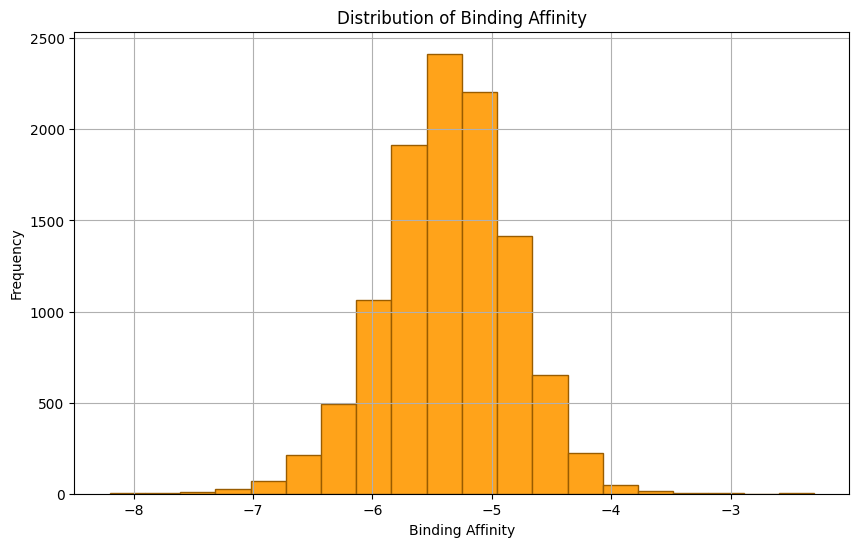

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(new_scores['Binding Affinity'], bins=20, color='#ffa31a', edgecolor='#995c00')
plt.title('Distribution of Binding Affinity')
plt.xlabel('Binding Affinity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

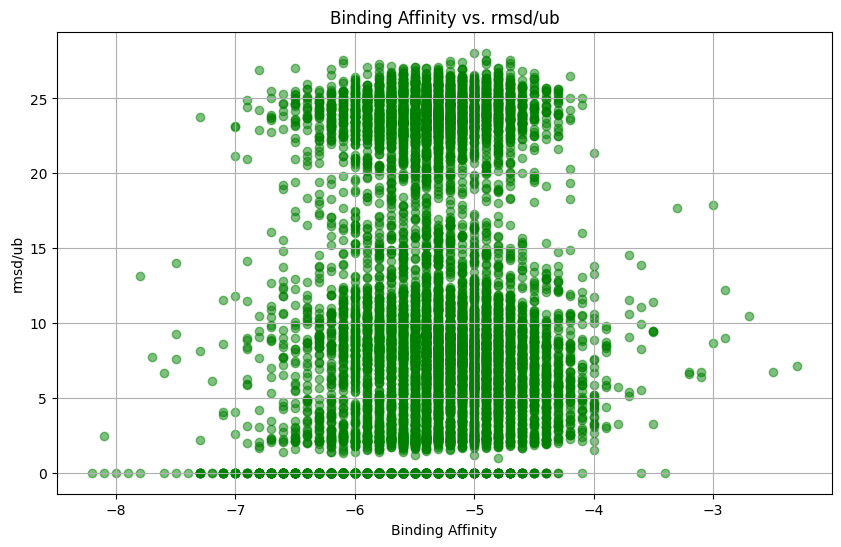

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(new_scores['Binding Affinity'], new_scores['rmsd/ub'], color='green', alpha=0.5)
plt.title('Binding Affinity vs. rmsd/ub')
plt.xlabel('Binding Affinity')
plt.ylabel('rmsd/ub')
plt.grid(True)
plt.show()

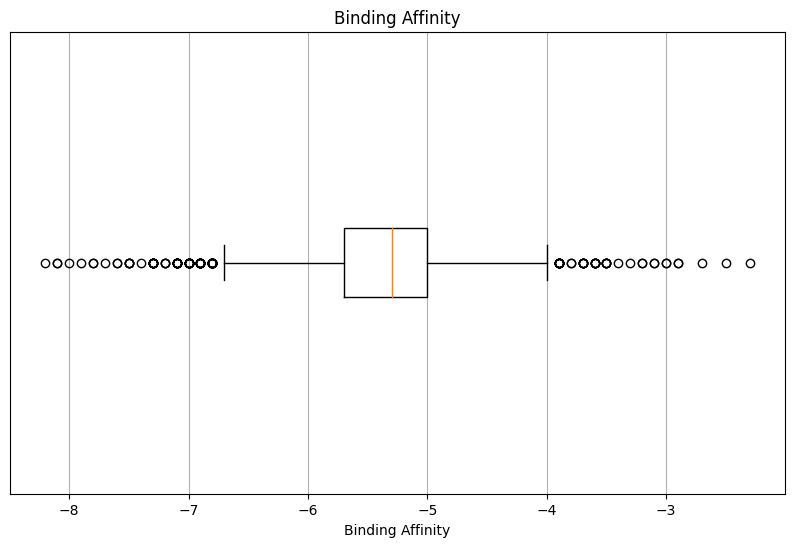

In [11]:
plt.figure(figsize=(10, 6))
plt.boxplot(new_scores['Binding Affinity'], vert=False)
plt.title('Binding Affinity')
plt.xlabel('Binding Affinity')
plt.yticks([])
plt.grid(True)
plt.show()

In [12]:
# Grouping the new_scores DataFrame by 'Ligand' and calculating the minimum value of 'Binding Affinity' for each group
# Explanation:
# - Grouping by 'Ligand' ensures that each ligand is treated as a separate group.
# - The minimum 'Binding Affinity' value for each ligand group is calculated.
# - The result is stored as a DataFrame with 'Ligand' as the index and the minimum 'Binding Affinity' as the only column.
new_scores = new_scores.groupby("Ligand").min()["Binding Affinity"].reset_index()

# Extracting 'id' from the 'Ligand' column
# Explanation:
# - 'Ligand' column contains strings with a specific format, e.g., 'some_text_idX_genY'.
# - Extracting 'id' involves splitting the string by '_' and extracting the element after 'id'.
# - The result is stored in a new column named 'id'.
new_scores['id'] = new_scores['Ligand'].str.split("_").str[2].str.split("gen").str[0].str.split("id").str[1]

# Extracting 'gen' from the 'Ligand' column
# Explanation:
# - Similar to extracting 'id', extracting 'gen' involves splitting the string by '_' and extracting the element after 'gen'.
# - The result is stored in a new column named 'gen'.
new_scores['gen'] = new_scores['Ligand'].str.split("_").str[2].str.split("gen").str[1]

# Renaming and reordering columns
# Explanation:
# - Renaming the 'Binding Affinity' column to 'score' to make it more descriptive.
# - Reordering columns to have 'id', 'gen', and 'score' as the first, second, and third columns, respectively.
new_scores['score'] = new_scores["Binding Affinity"]
new_scores = new_scores[['id', 'gen', 'score']]

# Displaying the first few rows of the modified new_scores DataFrame
new_scores.head()

,id,gen,score
0,AAZD,2,-5.2
1,AAZE,2,-5.5
2,AAZF,2,-5.4
3,AAZG,2,-6.8
4,AAZH,2,-5.6


In [13]:
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


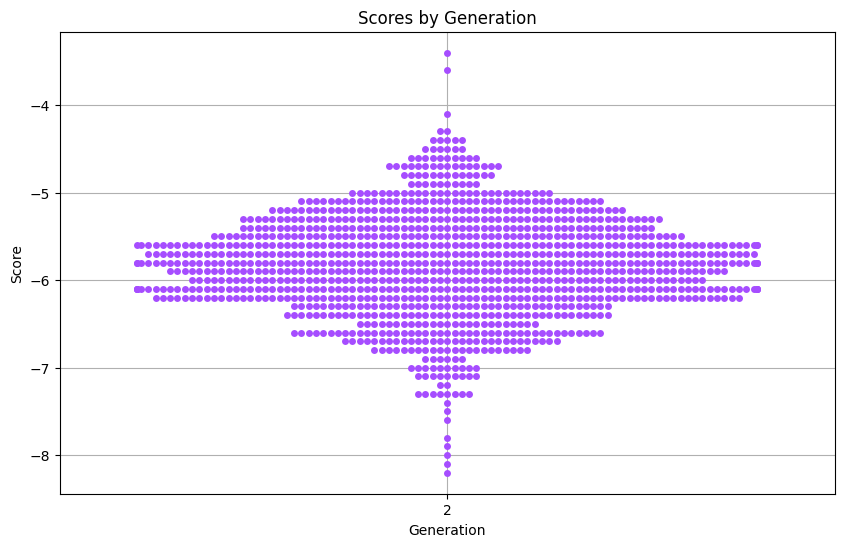

In [14]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='gen', y='score', data=new_scores, color="#a64dff")
plt.title('Scores by Generation')
plt.xlabel('Generation')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [15]:
# Converting 'id' column in new_scores DataFrame to string type
# This step ensures consistency in data type for 'id' column.
new_scores.id = new_scores.id.astype(str)

# Converting 'gen' column in new_scores DataFrame to integer type
# This step ensures consistency in data type for 'gen' column.
new_scores.gen = new_scores.gen.astype(int)

# Converting 'id' column and 'gen' column in master_table DataFrame to string and integer types, respectively
# These steps ensure consistency in data types for 'id' and 'gen' columns in master_table.
master_table.id = master_table.id.astype(str)
master_table.gen = master_table.gen.astype(int)

# Merging master_table and new_scores DataFrames based on 'id' and 'gen' columns
# The merge is performed using 'id' and 'gen' columns as the joining keys.
# The suffixes '_old' and '_new' are added to distinguish columns from the original and new DataFrames.
# Left join is used to retain all rows from the master_table DataFrame.
new_table = pd.merge(master_table, new_scores, on=['id', 'gen'], suffixes=('_old', '_new'), how='left')

# Updating 'score' column in new_table DataFrame based on conditions
# If 'score_new' is null, 'score_old' is used; otherwise, 'score_new' is used.
# This step ensures that the 'score' column contains updated values from new_scores DataFrame if available.
new_table['score'] = np.where(new_table['score_new'].isnull(), new_table['score_old'], new_table['score_new'])

# Dropping 'score_old' and 'score_new' columns from new_table DataFrame
# These columns are dropped as they are no longer needed after updating the 'score' column.
new_table = new_table.drop(['score_old', 'score_new'], axis=1)

# Calculating molecular weight ('weight') based on SMILES representation
# Molecular weight is calculated using RDKit's MolWt function applied to each SMILES string.
new_table['weight'] = new_table['smile'].apply(lambda x: rdkit.Chem.Descriptors.MolWt(Chem.MolFromSmiles(x)))

# Sorting new_table DataFrame based on 'score' column in ascending order
# This step sorts the DataFrame based on the calculated 'score' values.
new_table = new_table.sort_values('score', ascending=True)

# Displaying the first few rows of the modified new_table DataFrame
new_table.head()

,smile,gen,id,source,weight,score_best,score_avg,similarity_to_hiv_inhibitors,similarity_to_remdesivir,score
1,C#Cc1cccc(Nc2ncnc3c2c(C(C)(C)C)c(C)n3CCC#N)c1,0,AAAA,generated,357.461,NaN,NaN,NaN,NaN,99.9
744,CN(C)CCC(CCNC(=O)Oc1ccccc1)(Cc1ccccc1)NC1CCCCC1,0,ABCP,generated,437.628,NaN,NaN,NaN,NaN,99.9
745,Cc1csc(SCC(=O)Nc2ccc(OC3CCCC3)nc2)n1,0,ABCQ,generated,349.481,NaN,NaN,NaN,NaN,99.9
746,CC1(C)Cc2cccc(C(C#N)NC(=O)C3CC3)c2C1,0,ABCR,generated,268.360,NaN,NaN,NaN,NaN,99.9
747,CC(C(=O)Nc1ccccc1N1CCCC1)n1nc(C(F)(F)F)cc1C(F)...,0,ABCS,generated,420.357,NaN,NaN,NaN,NaN,99.9


In [16]:
# Save new_table to a CSV file with generation number in the filename
new_table.to_csv(r'master_results_table_gen' + str(GLOBAL_GENERATION - 1) + '.csv', index=False)

In [17]:
# Extract top 35 unique SMILES strings for training
training_smiles = list(set(list(new_table.head(35)['smile'])))
# Check the number of unique SMILES extracted for training
len(training_smiles)

35

In [18]:
# Generate fingerprints for each SMILES string in the training set
training_fingerprints = []
for smile in training_smiles:
    training_fingerprints.append(Chem.RDKFingerprint(Chem.MolFromSmiles(smile)))

# Function to calculate similarity-adjusted score for each row in new_table
def calc_similarity_score(row):
    # Generate fingerprint for the current row's SMILES string
    fingerprint = Chem.RDKFingerprint(Chem.MolFromSmiles(row['smile']))
    # Calculate Tanimoto similarity between the current fingerprint and all training fingerprints,
    # then adjust the score based on the highest similarity
    similarity = np.max(DataStructs.BulkTanimotoSimilarity(fingerprint, training_fingerprints))
    adj_factor = (1 / similarity) ** 0.333
    adj_score = row['score'] * adj_factor
    return adj_score

# Create a deep copy of new_table and filter out rows with molecular weight greater than 900
similarity_adjusted = new_table.copy(deep=True)
similarity_adjusted = similarity_adjusted[similarity_adjusted['weight'] < 900]

# Apply calc_similarity_score function to calculate similarity-adjusted score for each row
similarity_adjusted['similarity_adj_score'] = similarity_adjusted.apply(calc_similarity_score, axis=1)

# Sort the similarity-adjusted DataFrame by 'similarity_adj_score' in ascending order
similarity_adjusted = similarity_adjusted.sort_values('similarity_adj_score', ascending=True)

# Display the first few rows of the similarity-adjusted DataFrame
similarity_adjusted.head()

,smile,gen,id,source,weight,score_best,score_avg,similarity_to_hiv_inhibitors,similarity_to_remdesivir,score,similarity_adj_score
1,C#Cc1cccc(Nc2ncnc3c2c(C(C)(C)C)c(C)n3CCC#N)c1,0,AAAA,generated,357.461,NaN,NaN,NaN,NaN,99.9,99.9
772,COc1ccc(-c2cc(-c3ncc(C)o3)c(N)o2)cc1OC,0,ABDR,generated,300.314,NaN,NaN,NaN,NaN,99.9,99.9
771,Cc1cccn2cc(S(=O)(=O)N(C)Cc3ccccc3)nc12,0,ABDQ,generated,315.398,NaN,NaN,NaN,NaN,99.9,99.9
770,CCc1noc(CC)c1CNC(=O)c1ccc(C)c(N)c1,0,ABDP,generated,287.363,NaN,NaN,NaN,NaN,99.9,99.9
769,CC(=O)Nc1ccc(OC(=O)c2cc(C)n(C)c2C)cc1,0,ABDO,generated,286.331,NaN,NaN,NaN,NaN,99.9,99.9


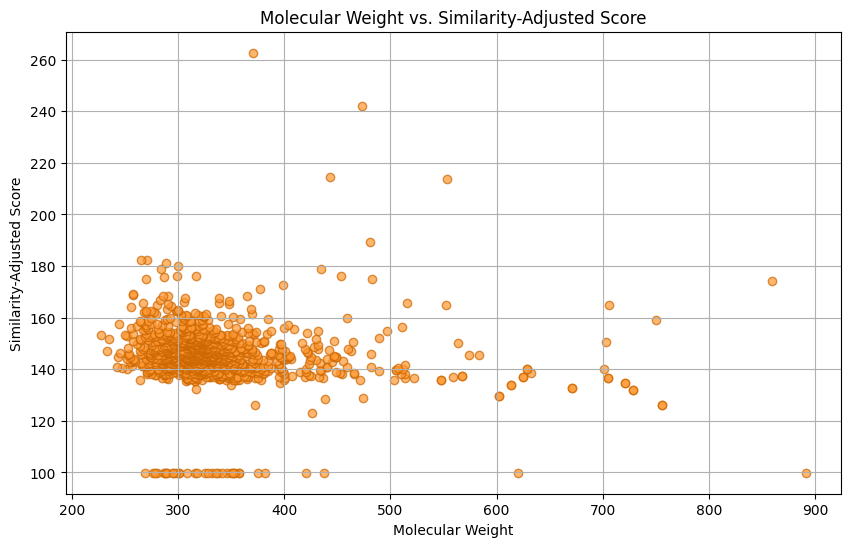

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(similarity_adjusted['weight'], similarity_adjusted['similarity_adj_score'],edgecolors='#cc6600' , color='#ff9933', alpha=0.7)
plt.title('Molecular Weight vs. Similarity-Adjusted Score')
plt.xlabel('Molecular Weight')
plt.ylabel('Similarity-Adjusted Score')
plt.grid(True)
plt.show()

In [20]:
# Add top 5 SMILES strings from similarity_adjusted to training_smiles
training_smiles += list(similarity_adjusted.head(5)['smile'])

# Check the updated length of training_smiles
len(training_smiles)


40

In [21]:
# Function to calculate weight-adjusted score for each row in new_table
def calc_weight_score(row):
    # Calculate adjustment factor based on molecular weight
    adj_factor = (900 / row['weight']) ** 0.333
    # Adjust score accordingly; if adj_factor < 1, set score to 0
    adj_score = row['score'] * adj_factor if adj_factor >= 1 else 0
    return adj_score

# Create a deep copy of new_table and calculate weight-adjusted scores for each row
weight_adjusted = new_table.copy(deep=True)
weight_adjusted['weight_adj_score'] = weight_adjusted.apply(calc_weight_score, axis=1)

# Sort the weight-adjusted DataFrame by 'weight_adj_score' in ascending order
weight_adjusted = weight_adjusted.sort_values('weight_adj_score', ascending=True)

# Display the first few rows of the weight-adjusted DataFrame
weight_adjusted.head()

,smile,gen,id,source,weight,score_best,score_avg,similarity_to_hiv_inhibitors,similarity_to_remdesivir,score,weight_adj_score
1009,CCCCCCCCCCCCCCCCCCC(C)CNC(=O)CCCCCCCCCCNC(=O)C...,0,ABMU,generated,1017.620,NaN,NaN,NaN,NaN,99.9,0.000000
417,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC(NC(...,0,AAQA,generated,1162.075,NaN,NaN,NaN,NaN,99.9,0.000000
743,CC1(C)C(O)CCC2(C)C1CCC1(C)C2CCC2C3C4CC=C5C(C(=...,0,ABCO,generated,891.243,NaN,NaN,NaN,NaN,99.9,100.225800
456,CCCCCCCCCCCCCCCCCCOC1CCC(OCCCCCCCCCCCCCCCCCC)C...,0,AARN,generated,859.324,NaN,NaN,NaN,NaN,99.9,101.450451
1105,CC(C)CN(CC(O)C(Cc1ccccc1)NC(=O)OC1COC2OCCC12)S...,0,ABQM,hiv,756.004,NaN,NaN,NaN,NaN,99.9,105.871660


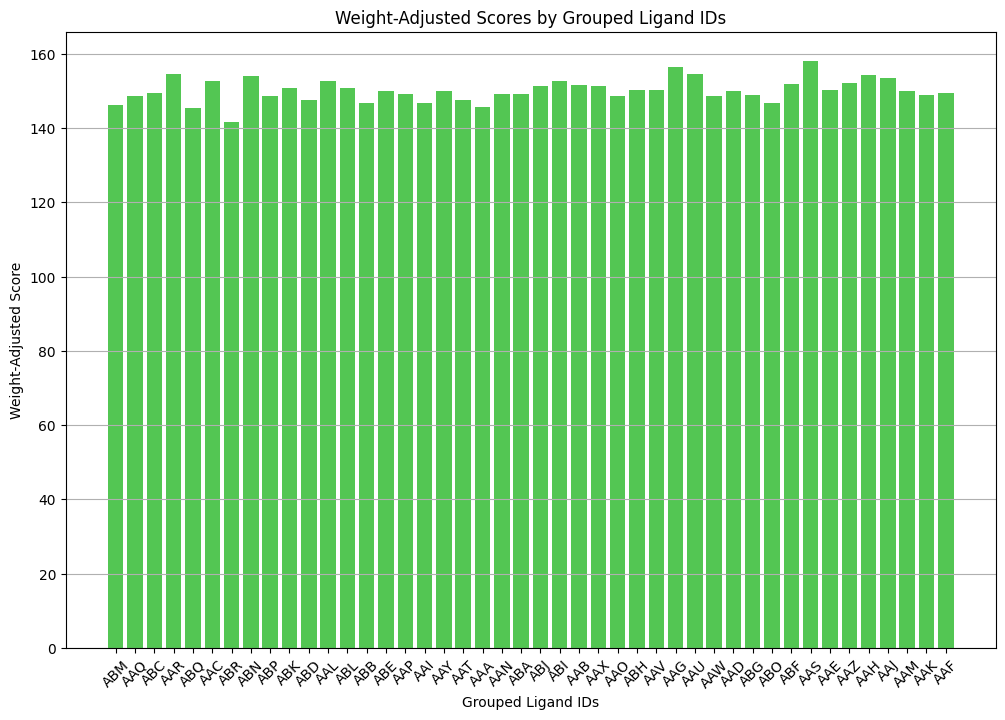

In [22]:
import matplotlib.pyplot as plt

# Grouping Ligand IDs by their first few characters
grouped_ids = weight_adjusted['id'].apply(lambda x: x[:3])  # Grouping by the first 3 characters, you can adjust as needed

# Creating a bar plot with grouped Ligand IDs
plt.figure(figsize=(12, 8))
plt.bar(grouped_ids, weight_adjusted['weight_adj_score'], color='#53c653')
plt.title('Weight-Adjusted Scores by Grouped Ligand IDs')
plt.xlabel('Grouped Ligand IDs')
plt.ylabel('Weight-Adjusted Score')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [23]:
# Add top 5 SMILES strings from weight_adjusted to training_smiles
training_smiles += list(weight_adjusted.head(5)['smile'])

# Check the updated length of training_smiles
len(training_smiles)

45

In [24]:
# Import TensorFlow library for deep learning tasks
import tensorflow

2024-02-29 03:57:01.044525: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 03:57:01.044661: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 03:57:01.219402: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [25]:
# Import NumPy library for numerical operations
import numpy as np

# Import copy function from copy module
from copy import copy

# Import model_from_json function from tensorflow.keras.models module
from tensorflow.keras.models import model_from_json

# Import Sequence class from tensorflow.keras.utils module
from tensorflow.keras.utils import Sequence

# Import Keras module
import keras

In [26]:
class SmilesTokenizer(object):
    def __init__(self):
        """
        Initializes a tokenizer for SMILES strings.
        """
        # Define lists of atoms, special characters, and padding symbols for SMILES tokenization
        atoms = [
        'Li', 'Na', 'Al', 'Si', 'Cl', 'Sc', 'Zn', 'As', 'Se', 'Br', 'Sn', 'Te',
        'Cn', 'H', 'B', 'C', 'N', 'O', 'F', 'P', 'S', 'K', 'V', 'I'
        ]
        special = [
        '(', ')', '[', ']', '=', '#', '%', '0', '1', '2', '3', '4', '5', '6',
        '7', '8', '9', '+', '-', 'se', 'te', 'c', 'n', 'o', 's'
        ]
        padding = ['G', 'A', 'E']


        # Combine atoms, special characters, and padding symbols to create token table
        self.table = sorted(atoms, key=len, reverse=True) + special + padding
        self.table_len = len(self.table)

        # Create one-hot encoding dictionary for tokens
        self.one_hot_dict = {}
        for i, symbol in enumerate(self.table):
            vec = np.zeros(self.table_len, dtype=np.float32)
            vec[i] = 1
            self.one_hot_dict[symbol] = vec

    def tokenize(self, smiles):
        """
        Tokenizes a SMILES string into individual tokens.
        """
        N = len(smiles)
        i = 0
        token = []

        # Tokenize the SMILES string
        timeout = time.time() + 5   # Set timeout for processing
        while (i < N):
            for j in range(self.table_len):
                symbol = self.table[j]
                if symbol == smiles[i:i + len(symbol)]:
                    token.append(symbol)
                    i += len(symbol)
                    break
            if time.time() > timeout:
                break
        return token

    def one_hot_encode(self, tokenized_smiles):
        """
        One-hot encodes a list of tokenized SMILES.
        """
        # Encode tokenized SMILES into one-hot vectors
        result = np.array(
            [self.one_hot_dict[symbol] for symbol in tokenized_smiles],
            dtype=np.float32)
        result = result.reshape(1, result.shape[0], result.shape[1])
        return result

In [27]:
class LSTMChem(object):
    def __init__(self, config, session='train'):
        """
        Initializes the LSTMChem model.

        Args:
            config: Configuration object containing model settings.
            session: String indicating the session type ('train', 'generate', or 'finetune').
        """
        assert session in ['train', 'generate', 'finetune'], \
            'one of {train, generate, finetune}'

        self.config = config
        self.session = session
        self.model = None

        if self.session == 'train':
            self.model = self.load(self.config.model_arch_filename,
                                   self.config.model_weight_filename)
            self.model.compile(optimizer=self.config.optimizer,
                               loss='categorical_crossentropy')
        else:
            self.model = self.load(self.config.model_arch_filename,
                                   self.config.model_weight_filename)

    def build_model(self):
        """
        Builds the LSTMChem model.
        """
        st = SmilesTokenizer()
        n_table = len(st.table)
        weight_init = RandomNormal(mean=0.0,
                                   stddev=0.05,
                                   seed=self.config.seed)

        self.model = Sequential()
        self.model.add(
            LSTM(units=self.config.units,
                 input_shape=(None, n_table),
                 return_sequences=True,
                 kernel_initializer=weight_init,
                 dropout=0.3))
        self.model.add(
            LSTM(units=self.config.units,
                 input_shape=(None, n_table),
                 return_sequences=True,
                 kernel_initializer=weight_init,
                 dropout=0.3))
        self.model.add(
            Dense(units=n_table,
                  activation='softmax',
                  kernel_initializer=weight_init))

        arch = self.model.to_json(indent=2)
        self.config.model_arch_filename = os.path.join(self.config.exp_dir,
                                                       'model_arch.json')
        with open(self.config.model_arch_filename, 'w') as f:
            f.write(arch)

        self.model.compile(optimizer=self.config.optimizer,
                           loss='categorical_crossentropy')

    def save(self, checkpoint_path):
        """
        Saves the model weights.

        Args:
            checkpoint_path: Path to save the model weights.
        """
        assert self.model, 'You have to build the model first.'

        print('Saving model ...')
        self.model.save_weights(checkpoint_path)
        print('Model saved.')

    def load(self, model_arch_file, checkpoint_file):
        """
        Loads the model architecture and weights.

        Args:
            model_arch_file: Path to the model architecture file.
            checkpoint_file: Path to the model weights file.

        Returns:
            Loaded Keras model.
        """
        print(f'Loading model architecture from {model_arch_file} ...')
        with open(model_arch_file) as f:
            model = model_from_json(f.read())
        print(f'Loading model checkpoint from {checkpoint_file} ...')
        model.load_weights(checkpoint_file)
        print('Loaded the Model.')
        return model


In [28]:
class LSTMChemGenerator(object):
    def __init__(self, modeler):
        """
        Initializes the LSTMChemGenerator.

        Args:
            modeler: LSTMChem modeler object containing the session, model, configuration, and tokenizer.
        """
        self.session = modeler.session
        self.model = modeler.model
        self.config = modeler.config
        self.st = SmilesTokenizer()

    def _generate(self, sequence):
        """
        Generates a SMILES sequence.

        Args:
            sequence: Initial SMILES sequence.

        Returns:
            Generated SMILES sequence.
        """
        while (sequence[-1] != 'E') and (len(self.st.tokenize(sequence)) <= self.config.smiles_max_length):
            x = self.st.one_hot_encode(self.st.tokenize(sequence))
            preds = self.model.predict_on_batch(x)[0][-1]
            next_idx = self.sample_with_temp(preds)
            sequence += self.st.table[next_idx]

        sequence = sequence[1:].rstrip('E')
        return sequence

    def sample_with_temp(self, preds):
        """
        Samples the next token index with temperature.

        Args:
            preds: Predicted probabilities for the next token.

        Returns:
            Index of the sampled token.
        """
        streched = np.log(preds) / self.config.sampling_temp
        streched_probs = np.exp(streched) / np.sum(np.exp(streched))
        return np.random.choice(range(len(streched)), p=streched_probs)

    def sample(self, num=1, start='G'):
        """
        Samples SMILES sequences.

        Args:
            num: Number of SMILES sequences to generate.
            start: Starting token for sequence generation.

        Returns:
            List of sampled SMILES sequences.
        """
        sampled = []
        if self.session == 'generate':
            for _ in tqdm(range(num)):
                sampled.append(self._generate(start))
            return sampled
        else:
            from rdkit import Chem, RDLogger
            RDLogger.DisableLog('rdApp.*')
            while len(sampled) < num:
                sequence = self._generate(start)
                mol = Chem.MolFromSmiles(sequence)
                if mol is not None:
                    canon_smiles = Chem.MolToSmiles(mol)
                    sampled.append(canon_smiles)
            return sampled

In [29]:
def get_config_from_json(json_file):
    """
    Reads configuration from a JSON file and returns it as a Bunch object.

    Args:
        json_file: Path to the JSON configuration file.

    Returns:
        Configuration Bunch object.
    """
    with open(json_file, 'r') as config_file:
        config_dict = json.load(config_file)
    config = Bunch(config_dict)
    return config


def process_config(json_file):
    """
    Processes configuration from a JSON file.

    Args:
        json_file: Path to the JSON configuration file.

    Returns:
        Processed configuration Bunch object.
    """
    config = get_config_from_json(json_file)
    config.config_file = json_file
    config.exp_dir = os.path.join(
        'experiments', time.strftime('%Y-%m-%d/', time.localtime()),
        config.exp_name)
    config.tensorboard_log_dir = os.path.join(
        'experiments', time.strftime('%Y-%m-%d/', time.localtime()),
        config.exp_name, 'logs/')
    config.checkpoint_dir = os.path.join(
        'experiments', time.strftime('%Y-%m-%d/', time.localtime()),
        config.exp_name, 'checkpoints/')
    return config

In [30]:
# Set the configuration file path
CONFIG_FILE = '/kaggle/input/setscmpz/config.json'

# Process the configuration from the JSON file
config = process_config(CONFIG_FILE)

# Initialize LSTMChem modeler for session 'generate'
modeler = LSTMChem(config, session='generate')

# Initialize LSTMChemGenerator using the modeler
generator = LSTMChemGenerator(modeler)

Loading model architecture from ../input/setscmpz/model_arch.json ...
Loading model checkpoint from ../input/setscmpz/LSTM_Chem-baseline-model-full.hdf5 ...
Loaded the Model.


In [31]:
# Define the number of samples to generate
sample_number = 20

In [32]:
# Generate SMILES strings using the LSTMChemGenerator
base_generated = generator.sample(num=sample_number)

100%|██████████| 20/20 [00:25<00:00,  1.30s/it]


In [33]:
def validate_mols(list_of_smiles):
    """
    Validates a list of SMILES strings and returns valid RDKit Mol objects.

    Args:
        list_of_smiles: List of SMILES strings to validate.

    Returns:
        List of valid RDKit Mol objects.
    """
    valid_mols = []
    for smi in list_of_smiles:
        mol = Chem.MolFromSmiles(smi)
        if mol is not None:
            valid_mols.append(mol)
    return valid_mols

def convert_mols_to_smiles(list_of_mols):
    """
    Converts a list of RDKit Mol objects to valid SMILES strings.

    Args:
        list_of_mols: List of RDKit Mol objects to convert.

    Returns:
        List of valid SMILES strings.
    """
    valid_smiles = [Chem.MolToSmiles(mol) for mol in list_of_mols]
    return valid_smiles

In [34]:
# Validate generated molecules and convert them to SMILES strings
base_generated_mols = validate_mols(base_generated)
base_generated_smiles = convert_mols_to_smiles(base_generated_mols)

# Shuffle the list of generated SMILES strings twice for randomness
random.shuffle(base_generated_smiles)
random.shuffle(base_generated_smiles)

# Select a subset of generated SMILES strings for training data to refine the molecule generator
training_smiles += base_generated_smiles[0:5]

# Check the updated length of training_smiles
len(training_smiles)

50

In [35]:
# Read the master results table from the previous generation
master_table = pd.read_csv('./master_results_table_gen' + str(GLOBAL_GENERATION-1) + '.csv', sep=',')

# Display the first few rows of the master table
master_table.head()

,smile,gen,id,source,weight,score_best,score_avg,similarity_to_hiv_inhibitors,similarity_to_remdesivir,score
0,C#Cc1cccc(Nc2ncnc3c2c(C(C)(C)C)c(C)n3CCC#N)c1,0,AAAA,generated,357.461,NaN,NaN,NaN,NaN,99.9
1,CN(C)CCC(CCNC(=O)Oc1ccccc1)(Cc1ccccc1)NC1CCCCC1,0,ABCP,generated,437.628,NaN,NaN,NaN,NaN,99.9
2,Cc1csc(SCC(=O)Nc2ccc(OC3CCCC3)nc2)n1,0,ABCQ,generated,349.481,NaN,NaN,NaN,NaN,99.9
3,CC1(C)Cc2cccc(C(C#N)NC(=O)C3CC3)c2C1,0,ABCR,generated,268.360,NaN,NaN,NaN,NaN,99.9
4,CC(C(=O)Nc1ccccc1N1CCCC1)n1nc(C(F)(F)F)cc1C(F)...,0,ABCS,generated,420.357,NaN,NaN,NaN,NaN,99.9


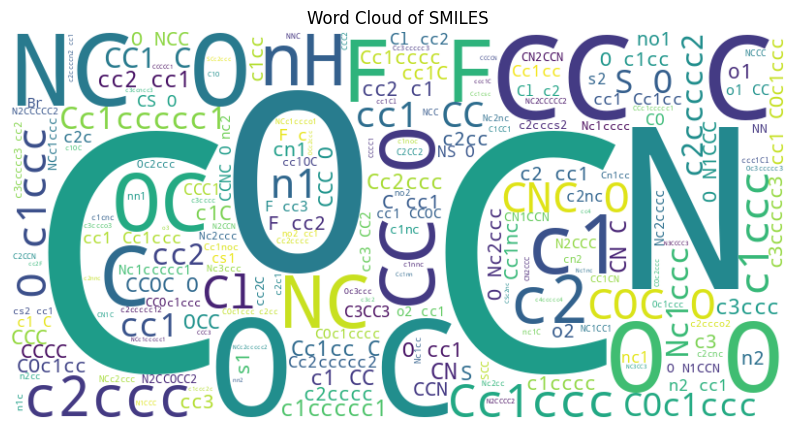

In [39]:
# Word Cloud of SMILES
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(master_table['smile']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of SMILES')
plt.show()

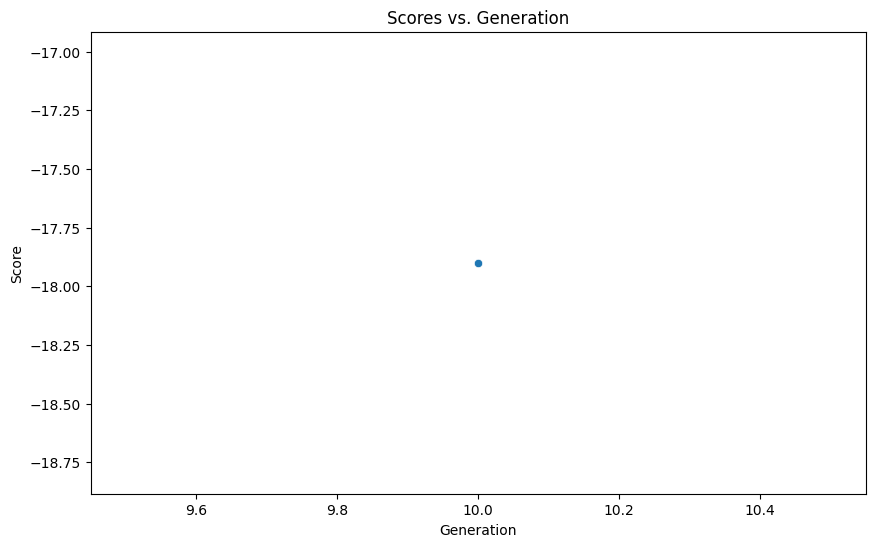

In [42]:
# Scatter Plot of Scores vs. Generation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gen', y='score_best', data=master_table)
plt.title('Scores vs. Generation')
plt.xlabel('Generation')
plt.ylabel('Score')
plt.show()

In [43]:
# Write training SMILES to a file for the current generation
with open('gen' + str(GLOBAL_GENERATION) + '_training.smi', 'w') as f:
    for item in training_smiles:
        f.write("%s\n" % item)

In [44]:
class LSTMChemFinetuner(LSTMChemGenerator):
    def __init__(self, modeler, finetune_data_loader):
        """
        Initializes the LSTMChemFinetuner.

        Args:
            modeler: LSTMChem modeler object containing the session, model, configuration, and tokenizer.
            finetune_data_loader: Data loader for fine-tuning the model.
        """
        self.session = modeler.session
        self.model = modeler.model
        self.config = modeler.config
        self.finetune_data_loader = finetune_data_loader
        self.st = SmilesTokenizer()

    def finetune(self):
        """
        Fine-tunes the LSTMChem model.

        Returns:
            Training history of the fine-tuning process.
        """
        # Compile the model with specified optimizer and loss function
        self.model.compile(optimizer=self.config.optimizer,
                           loss='categorical_crossentropy')

        # Fit the model using the fine-tuning data loader
        history = self.model.fit_generator(
            self.finetune_data_loader,
            steps_per_epoch=self.finetune_data_loader.__len__(),
            epochs=self.config.finetune_epochs,
            verbose=self.config.verbose_training,
            use_multiprocessing=True,
            shuffle=True)
        
        return history

In [45]:
# Load and process the configuration from the specified JSON file
config = process_config('../input/setscmpz/config.json')

# Update the model weight filename and finetune data filename in the configuration
# config['model_weight_filename'] = 'finetuned_gen' + str(GLOBAL_GENERATION-1) + '.hdf5'
config['model_weight_filename'] = '../input/setscmpz/LSTM_Chem-baseline-model-full.hdf5'
config['finetune_data_filename'] = 'gen' + str(GLOBAL_GENERATION) + '_training.smi'

# Print the updated configuration
print(config)

batch_size: 512
checkpoint_dir: experiments/2024-02-29/LSTM_Chem/checkpoints/
checkpoint_mode: min
checkpoint_monitor: val_loss
checkpoint_save_best_only: false
checkpoint_save_weights_only: true
checkpoint_verbose: 1
config_file: ../input/setscmpz/config.json
data_filename: ../input/setscmpz/dataset_cleansed.smi
data_length: 0
exp_dir: experiments/2024-02-29/LSTM_Chem
exp_name: LSTM_Chem
finetune_batch_size: 1
finetune_data_filename: gen3_training.smi
finetune_epochs: 20
model_arch_filename: ../input/setscmpz/model_arch.json
model_weight_filename: ../input/setscmpz/LSTM_Chem-baseline-model-full.hdf5
num_epochs: 42
optimizer: adam
sampling_temp: 0.75
seed: 71
smiles_max_length: 128
tensorboard_log_dir: experiments/2024-02-29/LSTM_Chem/logs/
tensorboard_write_graph: true
train_smi_max_len: 128
units: 256
validation_split: 0.1
verbose_training: true



In [46]:
class DataLoader(Sequence):
    def __init__(self, config, data_type='train'):
        """
        Initializes the DataLoader.

        Args:
            config: Configuration object.
            data_type: Type of data ('train', 'valid', or 'finetune').
        """
        self.config = config
        self.data_type = data_type
        assert self.data_type in ['train', 'valid', 'finetune']

        self.max_len = 0

        if self.data_type == 'train':
            self.smiles = self._load(self.config.data_filename)
        elif self.data_type == 'finetune':
            self.smiles = self._load(self.config.finetune_data_filename)
        else:
            pass

        self.st = SmilesTokenizer()
        self.one_hot_dict = self.st.one_hot_dict

        self.tokenized_smiles = self._tokenize(self.smiles)

        if self.data_type in ['train', 'valid']:
            self.idx = np.arange(len(self.tokenized_smiles))
            self.valid_size = int(
                np.ceil(
                    len(self.tokenized_smiles) * self.config.validation_split))
            np.random.seed(self.config.seed)
            np.random.shuffle(self.idx)

    def __len__(self):
        """
        Returns the number of batches.

        Returns:
            Number of batches.
        """
        target_tokenized_smiles = self._set_data()
        if self.data_type in ['train', 'valid']:
            ret = int(
                np.ceil(
                    len(target_tokenized_smiles) /
                    float(self.config.batch_size)))
        else:
            ret = int(
                np.ceil(
                    len(target_tokenized_smiles) /
                    float(self.config.finetune_batch_size)))
        return ret

    def __getitem__(self, idx):
        """
        Generates one batch of data.

        Args:
            idx: Index of the batch.

        Returns:
            Tuple of input and target data arrays.
        """
        target_tokenized_smiles = self._set_data()
        if self.data_type in ['train', 'valid']:
            data = target_tokenized_smiles[idx *
                                           self.config.batch_size:(idx + 1) *
                                           self.config.batch_size]
        else:
            data = target_tokenized_smiles[idx *
                                           self.config.finetune_batch_size:
                                           (idx + 1) *
                                           self.config.finetune_batch_size]
        data = self._padding(data)

        self.X, self.y = [], []
        for tp_smi in data:
            X = [self.one_hot_dict[symbol] for symbol in tp_smi[:-1]]
            self.X.append(X)
            y = [self.one_hot_dict[symbol] for symbol in tp_smi[1:]]
            self.y.append(y)

        self.X = np.array(self.X, dtype=np.float32)
        self.y = np.array(self.y, dtype=np.float32)

        return self.X, self.y

    def _set_data(self):
        """
        Sets the data for training, validation, or fine-tuning.

        Returns:
            List of tokenized SMILES strings.
        """
        if self.data_type == 'train':
            ret = [
                self.tokenized_smiles[self.idx[i]]
                for i in self.idx[self.valid_size:]
            ]
        elif self.data_type == 'valid':
            ret = [
                self.tokenized_smiles[self.idx[i]]
                for i in self.idx[:self.valid_size]
            ]
        else:
            ret = self.tokenized_smiles
        return ret

    def _load(self, data_filename):
        """
        Loads SMILES data from file.

        Args:
            data_filename: Path to the data file.

        Returns:
            List of SMILES strings.
        """
        length = self.config.data_length
        print('loading SMILES...')
        with open(data_filename) as f:
            smiles = [s.rstrip() for s in f]
        if length != 0:
            smiles = smiles[:length]
        print('done.')
        return smiles

    def _tokenize(self, smiles):
        """
        Tokenizes SMILES strings.

        Args:
            smiles: List of SMILES strings.

        Returns:
            List of tokenized SMILES strings.
        """
        assert isinstance(smiles, list)
        print('tokenizing SMILES...')
        tokenized_smiles = [self.st.tokenize(smi) for smi in tqdm(smiles)]

        if self.data_type == 'train':
            for tokenized_smi in tokenized_smiles:
                length = len(tokenized_smi)
                if self.max_len < length:
                    self.max_len = length
            self.config.train_smi_max_len = self.max_len
        print('done.')
        return tokenized_smiles

    def _pad(self, tokenized_smi):
        """
        Pads tokenized SMILES strings.

        Args:
            tokenized_smi: Tokenized SMILES string.

        Returns:
            Padded tokenized SMILES string.
        """
        return ['G'] + tokenized_smi + ['E'] + [
            'A' for _ in range(self.max_len - len(tokenized_smi))
        ]

    def _padding(self, data):
        """
        Pads data.

        Args:
            data: List of tokenized SMILES strings.

        Returns:
            List of padded SMILES strings.
        """
        padded_smiles = [self._pad(t_smi) for t_smi in data]
        return padded_smiles

In [47]:
# Initialize the modeler for fine-tuning and create a data loader for fine-tuning
modeler = LSTMChem(config, session='finetune')
finetune_dl = DataLoader(config, data_type='finetune')

# Initialize the LSTMChemFinetuner with the modeler and fine-tuning data loader
finetuner = LSTMChemFinetuner(modeler, finetune_dl)

# Fine-tune the model using the finetuner
finetuner.finetune()

Loading model architecture from ../input/setscmpz/model_arch.json ...
Loading model checkpoint from ../input/setscmpz/LSTM_Chem-baseline-model-full.hdf5 ...
Loaded the Model.
loading SMILES...
done.
tokenizing SMILES...


100%|██████████| 50/50 [00:00<00:00, 2472.27it/s]

done.
Epoch 1/20



/tmp/ipykernel_33/116120952.py:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = self.model.fit_generator(
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


48/50 [===========================>..] - ETA: 0s - loss: 0.6863

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


50/50 [==============================] - 19s 268ms/step - loss: 0.6907
Epoch 2/20
50/50 [==============================] - 12s 245ms/step - loss: 0.5517
Epoch 3/20
50/50 [==============================] - 13s 245ms/step - loss: 0.4978
Epoch 4/20
50/50 [==============================] - 12s 236ms/step - loss: 0.4637
Epoch 5/20
50/50 [==============================] - 12s 234ms/step - loss: 0.3907
Epoch 6/20
50/50 [==============================] - 12s 244ms/step - loss: 0.4058
Epoch 7/20
50/50 [==============================] - 12s 231ms/step - loss: 0.3267
Epoch 8/20
50/50 [==============================] - 12s 246ms/step - loss: 0.3073
Epoch 9/20
50/50 [==============================] - 12s 227ms/step - loss: 0.2872
Epoch 10/20
50/50 [==============================] - 12s 243ms/step - loss: 0.2633
Epoch 11/20
50/50 [==============================] - 13s 249ms/step - loss: 0.2675
Epoch 12/20
50/50 [==============================] - 13s 250ms/step - loss: 0.2576
Epoch 13/20
50/50 [=====

In [48]:
finetuner.model.save_weights('finetuned_gen' + str(GLOBAL_GENERATION) + '.hdf5')

In [49]:
# Update the model weight filename in the configuration
config['model_weight_filename'] = './finetuned_gen' + str(GLOBAL_GENERATION) + '.hdf5'

# Initialize the modeler and generator for generation using the updated configuration
modeler = LSTMChem(config, session='generate')
generator = LSTMChemGenerator(modeler)

# Print the updated configuration
print(config)

Loading model architecture from ../input/setscmpz/model_arch.json ...
Loading model checkpoint from ./finetuned_gen3.hdf5 ...
Loaded the Model.
batch_size: 512
checkpoint_dir: experiments/2024-02-29/LSTM_Chem/checkpoints/
checkpoint_mode: min
checkpoint_monitor: val_loss
checkpoint_save_best_only: false
checkpoint_save_weights_only: true
checkpoint_verbose: 1
config_file: ../input/setscmpz/config.json
data_filename: ../input/setscmpz/dataset_cleansed.smi
data_length: 0
exp_dir: experiments/2024-02-29/LSTM_Chem
exp_name: LSTM_Chem
finetune_batch_size: 1
finetune_data_filename: gen3_training.smi
finetune_epochs: 20
model_arch_filename: ../input/setscmpz/model_arch.json
model_weight_filename: ./finetuned_gen3.hdf5
num_epochs: 42
optimizer: adam
sampling_temp: 0.75
seed: 71
smiles_max_length: 128
tensorboard_log_dir: experiments/2024-02-29/LSTM_Chem/logs/
tensorboard_write_graph: true
train_smi_max_len: 128
units: 256
validation_split: 0.1
verbose_training: true



In [51]:
# Generate a large number of SMILES strings using the generator
sample_number = 50
sampled_smiles = generator.sample(num=sample_number)

100%|██████████| 50/50 [00:48<00:00,  1.03it/s]


In [52]:
# Analyze the generated SMILES strings:
# - Evaluate validity, uniqueness, and originality
valid_mols = []
for smi in sampled_smiles:
    mol = Chem.MolFromSmiles(smi)
    if mol is not None:
        valid_mols.append(mol)

# Calculate validity
print('Validity:', f'{len(valid_mols) / sample_number:.2%}')

# Calculate uniqueness
valid_smiles = [Chem.MolToSmiles(mol) for mol in valid_mols]
print('Uniqueness:', f'{len(set(valid_smiles)) / len(valid_smiles):.2%}')

# Determine originality by checking how many valid SMILES are not in the training data
import pandas as pd
training_data = pd.read_csv('../input/setscmpz/dataset_cleansed.smi', header=None)
training_set = set(list(training_data[0]))
original = [smile for smile in set(valid_smiles) if smile not in training_set]
print('Originality:', f'{len(set(original)) / len(set(valid_smiles)):.2%}')

[04:11:55] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 18 19
[04:11:55] SMILES Parse Error: extra open parentheses for input: 'CCCCc1ccc(C(NC(=O)CCc2ccc(O)cc2)cc1'
[04:11:55] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 22 23
[04:11:55] Can't kekulize mol.  Unkekulized atoms: 4 6 7
[04:11:55] SMILES Parse Error: extra open parentheses for input: 'CCC(Nc1ncc(F)c(Nc2ccc(C(N)=O)cn2)n1'
[04:11:55] Can't kekulize mol.  Unkekulized atoms: 9 10 11 16 17


Validity: 88.00%
Uniqueness: 70.45%
Originality: 100.00%


In [53]:
# Remove duplicate valid SMILES strings to ensure uniqueness
valid_smiles = list(set(valid_smiles))
# Calculate the number of unique valid SMILES strings
len(valid_smiles)

31

In [54]:
# Function to append new molecules to the tracking table and prepare them for export
def append_to_tracking_table(master_table, mols_to_append, source, generation):
    # Initialize lists for tracking and table rows
    mols_to_export = []
    rows_list = []
    
    # Filter master_table for the current generation
    master_table_gen = master_table[master_table['gen'] == generation]
    
    # Generate a unique ID code for the new molecules
    if master_table_gen.shape[0] == 0:
        id_code = 'AAAA'
    else:
        master_table_gen_ids = master_table_gen.sort_values('id', ascending=True)
        master_table_gen_max_id = master_table_gen_ids.tail(1)
        key = master_table_gen_max_id['id'].keys()[0]
        id_code = iterate_alpha(str(master_table_gen_max_id['id'][key]))
        
    # Load training data for comparison
    training_data = pd.read_csv('../input/setscmpz/dataset_cleansed.smi', header=None)
    training_set = set(list(training_data[0]))
    
    # Iterate through molecules to append
    for mol in mols_to_append:
        pm = Chem.PropertyMol.PropertyMol(mol)
        title = 'id' + str(id_code) + 'gen'+ str(generation)
        print(title)
        # Set a title property for tracking
        pm.SetProp('Title', title)
        mols_to_export.append(pm)

        # Track molecule details in pandas dataframe
        mol_dict = {}
        mol_dict['id'] = id_code
        mol_dict['gen'] = generation
        smile = Chem.MolToSmiles(mol)
        assert type(smile) == type('string')
        mol_dict['smile'] = smile

        # Determine source of molecule
        if (source != 'hiv' and source != 'manual' and source != 'baseline') and (smile in training_set):
            mol_dict['source'] = 'training'
        else:
            mol_dict['source'] = source
        mol_dict['score'] = 99.9

        rows_list.append(mol_dict)
        id_code = iterate_alpha(id_code)
        
    # Create a pandas dataframe from the list of rows
    df = pd.DataFrame(rows_list)
    return df, mols_to_export 

In [55]:
# Function to iterate an alpha code by incrementing it
def iterate_alpha(alpha_code):
    # Convert alpha code to a list of ASCII numbers representing each character
    numbers = [ord(letter) for letter in alpha_code]
    
    # Increment the alpha code based on specific conditions
    if numbers[3] + 1 > 90:  # If the fourth character is 'Z'
        if numbers[2] + 1 > 90:  # If the third character is 'Z'
            if numbers[1] + 1 > 90:  # If the second character is 'Z'
                if numbers[0] + 1 > 90:  # If the first character is 'Z', raise an error (too long for alpha code)
                    raise ValueError('Too long for alpha code')
                else:
                    # Reset the fourth, third, and second characters to 'A' and increment the first character
                    numbers[3] = 65
                    numbers[2] = 65
                    numbers[1] = 65
                    numbers[0] = numbers[0] + 1
            else:
                # Reset the fourth character to 'A' and increment the third and second characters
                numbers[3] = 65
                numbers[2] = 65
                numbers[1] = numbers[1] + 1
        else:
            # Reset the fourth character to 'A' and increment the third character
            numbers[3] = 65
            numbers[2] = numbers[2] + 1
    else:
        # Increment the fourth character
        numbers[3] = numbers[3] + 1
    
    # Convert the list of ASCII numbers back to a string representing the new alpha code
    new_code = "".join(chr(number) for number in numbers)
    return new_code

# Example usage: Incrementing the alpha code 'AAAA' to the next code
iterate_alpha('AAAA')

'AAAB'

In [62]:
# Validate the generated SMILES strings to ensure they represent valid molecules
mols_for_next_generation = validate_mols(valid_smiles)

# Load the master table from the previous generation
master_table = pd.read_csv('./master_results_table_gen' + str(GLOBAL_GENERATION-1) +'.csv',sep=',')

# Append new molecules to the master table for tracking and analysis
new_mols_to_test = append_to_tracking_table(master_table, mols_for_next_generation, 'generated', GLOBAL_GENERATION)
mols_for_pd = new_mols_to_test[0]  # Extract the DataFrame of new molecules
mols_for_export = new_mols_to_test[1]  # Extract the list of molecules for export

# Append the new molecules DataFrame to the master table
master_table = pd.concat([master_table, mols_for_pd], ignore_index=True)
master_table = master_table.reset_index(drop=True)  # Reset the index
# Save the updated master table to a CSV file for future reference
master_table.to_csv(r'./master_results_table_gen' + str(GLOBAL_GENERATION) + '.csv', index=False)

idAAAAgen3
idAAABgen3
idAAACgen3
idAAADgen3
idAAAEgen3
idAAAFgen3
idAAAGgen3
idAAAHgen3
idAAAIgen3
idAAAJgen3
idAAAKgen3
idAAALgen3
idAAAMgen3
idAAANgen3
idAAAOgen3
idAAAPgen3
idAAAQgen3
idAAARgen3
idAAASgen3
idAAATgen3
idAAAUgen3
idAAAVgen3
idAAAWgen3
idAAAXgen3
idAAAYgen3
idAAAZgen3
idAABAgen3
idAABBgen3
idAABCgen3
idAABDgen3
idAABEgen3


In [63]:
# Assuming mols_for_export has been assigned a value
print(len(mols_for_export))

31


In [64]:
def write_gen_to_sdf(mols_for_export, generation, batch_size):
    # Check if the number of molecules exceeds the batch size
    if len(mols_for_export) > batch_size:
        # Calculate the number of batches needed
        batches = (len(mols_for_export) // batch_size) + 1
        # Iterate over each batch
        for i in range(batches):
            # Extract the current batch of molecules
            batch_to_export = mols_for_export[i * batch_size:(i + 1) * batch_size]
            # Create an SDF writer for the current batch
            w = Chem.SDWriter('gen' + str(generation) + '_batch_' + str(i + 1) + '.sdf')
            # Write each molecule in the batch to the SDF file
            for m in batch_to_export:
                w.write(m)
    else:
        # If the number of molecules does not exceed the batch size, write them to a single SDF file
        w = Chem.SDWriter('gen' + str(generation) + '.sdf')
        for m in mols_for_export:
            w.write(m)
    
    # Ensure the last molecule is written correctly by writing it to an arbitrary SDF file
    w = Chem.SDWriter('test.sdf')
    w.write(mols_for_export[-1])
    
    return mols_for_export

In [65]:
write_gen_to_sdf(mols_for_export, GLOBAL_GENERATION, 2000)  # Export the generated molecules to SDF files
print('ok')  # Print 'ok' to indicate that the export process is complete

ok
